In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = 'USDJPY=X'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-14 00:00:00+00:00,140.115005,140.714005,137.809006,140.339996,0,0.0,0.0
2022-11-21 00:00:00+00:00,140.253006,142.238998,138.095001,139.119995,0,0.0,0.0
2022-11-28 00:00:00+00:00,139.309998,139.882996,133.673004,134.309998,0,0.0,0.0
2022-12-05 00:00:00+00:00,134.475006,137.837997,134.134003,136.580002,0,0.0,0.0
2022-12-12 00:00:00+00:00,136.712006,137.942001,134.681000,136.699997,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-14 00:00:00+01:00,149.334000,150.139008,148.852997,149.520004,0,0.0,0.0
2024-10-21 00:00:00+01:00,149.600006,153.164993,149.095993,152.279999,0,0.0,0.0
2024-10-28 00:00:00+00:00,152.951996,153.867996,151.835007,153.009995,0,0.0,0.0


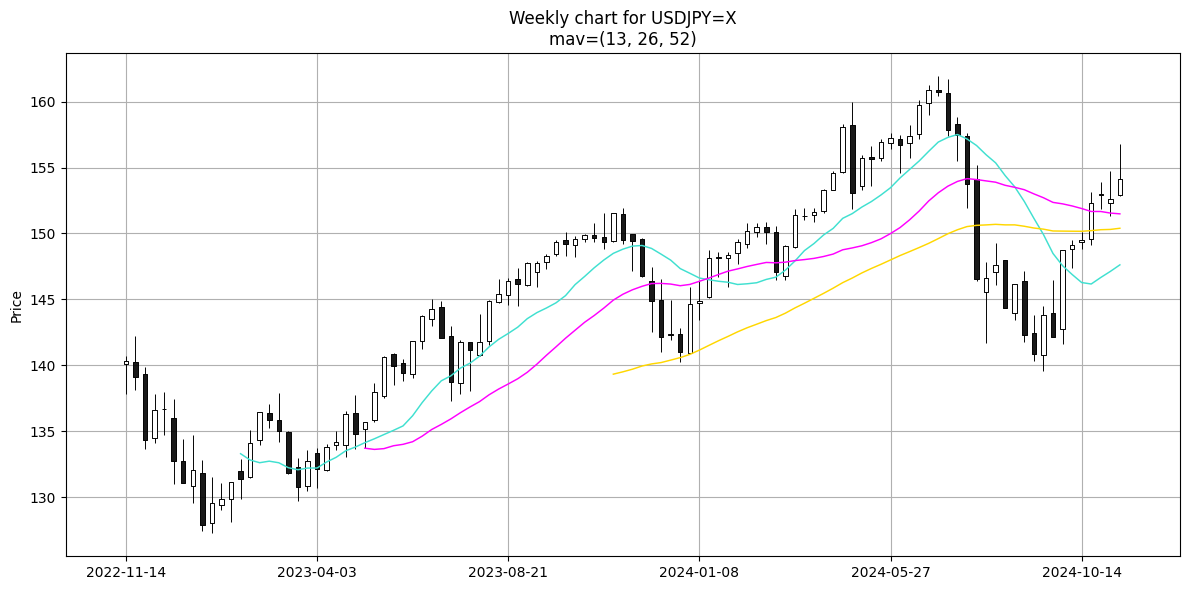

In [8]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s\nmav=(13, 26, 52)' % symbol)
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_exchange.png')
plt.show()

In [3]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-11 00:00:00+00:00,152.904007,156.748001,152.869995,154.119995,0,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2024-11-04 00:00:00+00:00    152.639999
2024-11-11 00:00:00+00:00    154.119995
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2024-11-04 00:00:00+00:00         NaN
2024-11-11 00:00:00+00:00    1.479996
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(26).mean()

Date
2022-11-14 00:00:00+00:00           NaN
2022-11-21 00:00:00+00:00           NaN
2022-11-28 00:00:00+00:00           NaN
2022-12-05 00:00:00+00:00           NaN
2022-12-12 00:00:00+00:00           NaN
                                ...    
2024-10-14 00:00:00+01:00    151.891923
2024-10-21 00:00:00+01:00    151.668462
2024-10-28 00:00:00+00:00    151.667308
2024-11-04 00:00:00+00:00    151.547308
2024-11-11 00:00:00+00:00    151.488077
Name: Close, Length: 105, dtype: float64

In [7]:
df['Close'].rolling(52).mean()

Date
2022-11-14 00:00:00+00:00           NaN
2022-11-21 00:00:00+00:00           NaN
2022-11-28 00:00:00+00:00           NaN
2022-12-05 00:00:00+00:00           NaN
2022-12-12 00:00:00+00:00           NaN
                                ...    
2024-10-14 00:00:00+01:00    150.165000
2024-10-21 00:00:00+01:00    150.215442
2024-10-28 00:00:00+00:00    150.285538
2024-11-04 00:00:00+00:00    150.307076
2024-11-11 00:00:00+00:00    150.395346
Name: Close, Length: 105, dtype: float64